In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
# Load the diamonds dataset
a = pd.read_csv('/content/diamonds.csv')
print(a)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
49995   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
49996   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
49997   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
49998   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
49999   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[50000 rows x 10 columns]


In [ ]:
# Map categorical features to numerical values
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

a['cut'] = a['cut'].map(cut_mapping)
a['color'] = a['color'].map(color_mapping)
a['clarity'] = a['clarity'].map(clarity_mapping)

In [ ]:
a.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


LINEAR REGRESSION
Root Mean Squared Error: 1186.4845496566309
Root Mean Absolute Error: 28.041482290571405


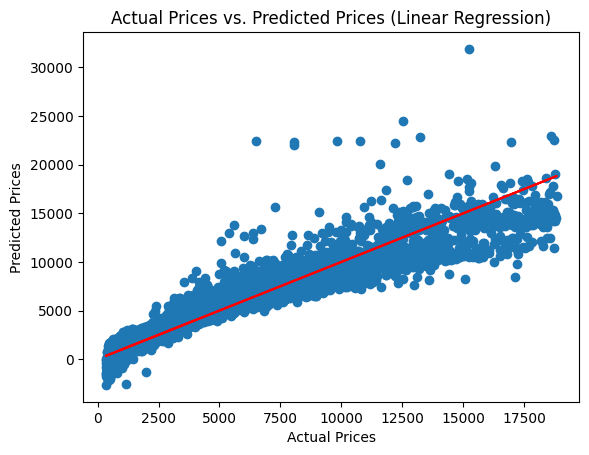

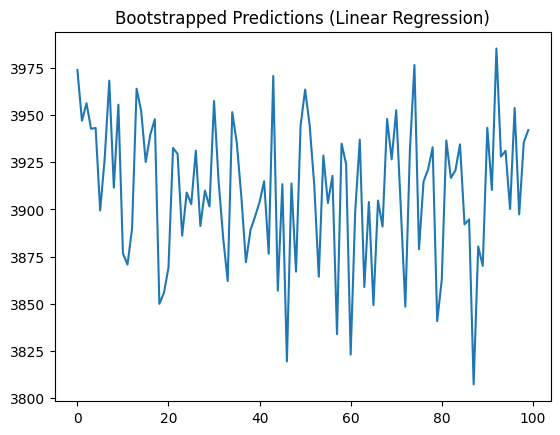

In [ ]:
# Define features (X) and target (y)
X = a.drop('price', axis=1)
y = a['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mae = np.sqrt(mean_absolute_error(y_test, lr_predictions))

print("LINEAR REGRESSION")
print("Root Mean Squared Error:", lr_rmse)
print("Root Mean Absolute Error:", lr_mae)

# Create a scatter plot of actual vs. predicted values
plt.scatter(y_test, lr_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Linear Regression)')
plt.plot(y_test, y_test, color='red')  # Line for perfect correlation
plt.show()

# Bootstrap for Linear Regression predictions
n_iterations = 100
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = lr_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)

plt.plot(bootstrap_predictions)
plt.title("Bootstrapped Predictions (Linear Regression)")
plt.show()



Support Vector Machine (SVM):
Mean Squared Error (MSE): 2967049.1538787787
Mean Absolute Error (MAE): 990.2357785278473


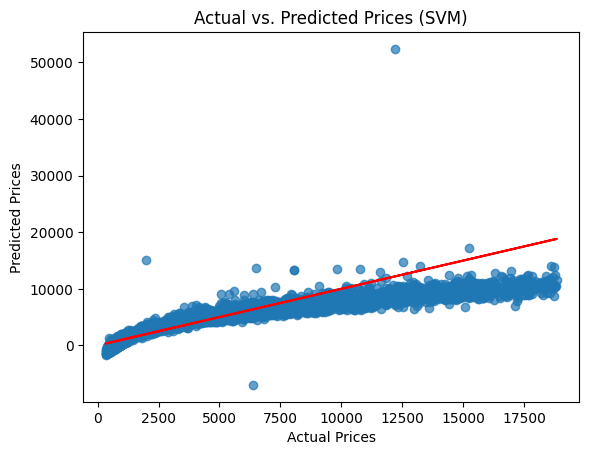

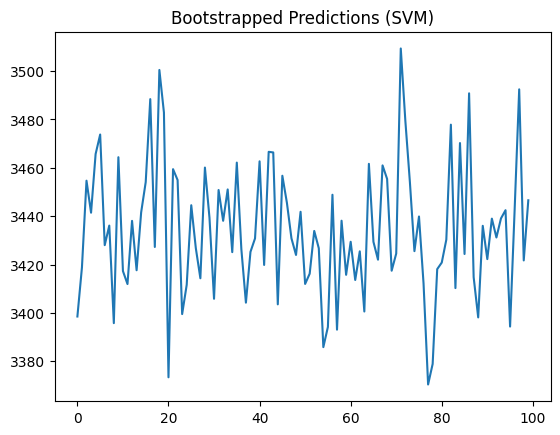

In [ ]:
# Support Vector Machine (SVM)
svr_model = SVR(kernel='linear', C=1.0)
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)

print("\nSupport Vector Machine (SVM):")
print(f"Mean Squared Error (MSE): {svr_mse}")
print(f"Mean Absolute Error (MAE): {svr_mae}")

# Create a scatter plot for SVM predictions
plt.scatter(y_test, svr_predictions, alpha=0.7)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices (SVM)')
plt.show()

# Bootstrap for SVM predictions
n_iterations = 100
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = svr_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)

plt.plot(bootstrap_predictions)
plt.title("Bootstrapped Predictions (SVM)")
plt.show()



RIDGE REGRESSION
Root Mean Squared Error: 1186.4697175595509
Root Mean Absolute Error: 28.048382878778654


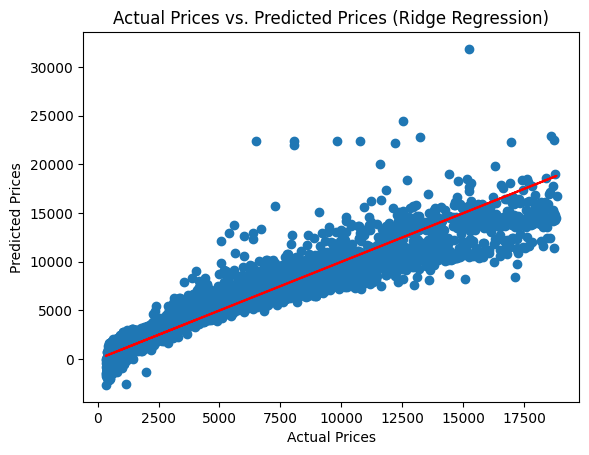

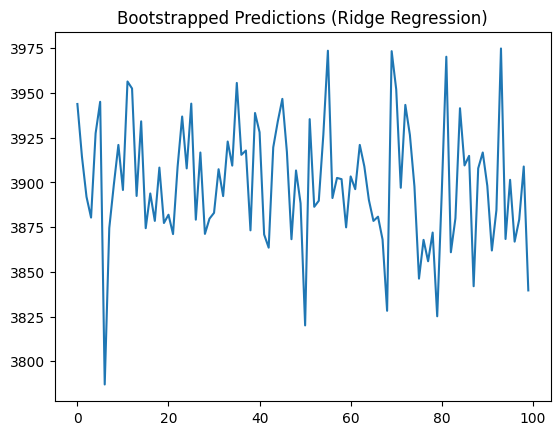

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_mae = np.sqrt(mean_absolute_error(y_test, ridge_predictions))

print("\nRIDGE REGRESSION")
print("Root Mean Squared Error:", ridge_rmse)
print("Root Mean Absolute Error:", ridge_mae)

# Create a scatter plot of actual vs. predicted values for Ridge Regression
plt.scatter(y_test, ridge_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Ridge Regression)')
plt.plot(y_test, y_test, color='red')
plt.show()

# Bootstrap for Ridge Regression predictions
n_iterations = 100
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = ridge_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)

plt.plot(bootstrap_predictions)
plt.title("Bootstrapped Predictions (Ridge Regression)")
plt.show()



LASSO REGRESSION
Root Mean Squared Error: 1183.397537790539
Root Mean Absolute Error: 28.06578924273558


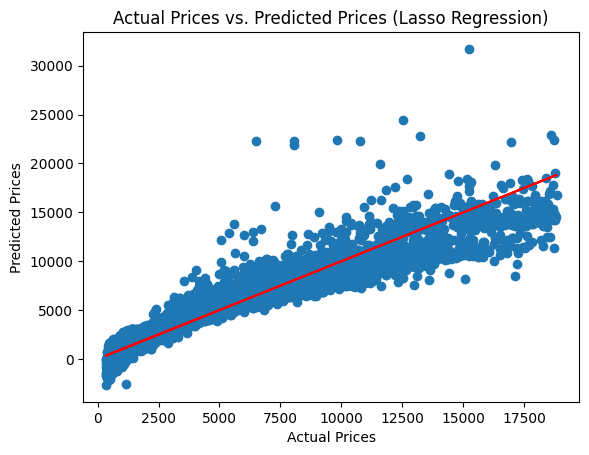

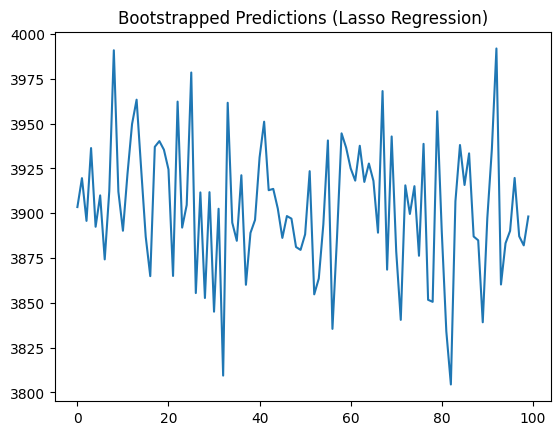

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_mae = np.sqrt(mean_absolute_error(y_test, lasso_predictions))

print("\nLASSO REGRESSION")
print("Root Mean Squared Error:", lasso_rmse)
print("Root Mean Absolute Error:", lasso_mae)

# Create a scatter plot of actual vs. predicted values for Lasso Regression
plt.scatter(y_test, lasso_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (Lasso Regression)')
plt.plot(y_test, y_test, color='red')
plt.show()

# Bootstrap for Lasso Regression predictions
n_iterations = 100
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = lasso_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)

plt.plot(bootstrap_predictions)
plt.title("Bootstrapped Predictions (Lasso Regression)")
plt.show()


KNN REGRESSION
Root Mean Squared Error: 847.2932739093354
Root Mean Absolute Error: 21.433676772779794


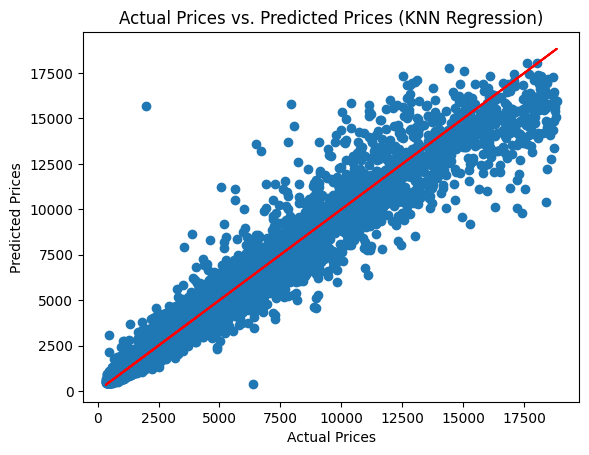

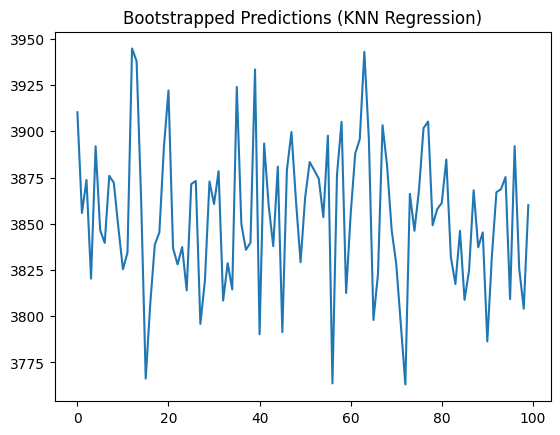

In [ ]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_mae = np.sqrt(mean_absolute_error(y_test, knn_predictions))

print("\nKNN REGRESSION")
print("Root Mean Squared Error:", knn_rmse)
print("Root Mean Absolute Error:", knn_mae)

# Create a scatter plot of actual vs. predicted values for KNN Regression
plt.scatter(y_test, knn_predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices (KNN Regression)')
plt.plot(y_test, y_test, color='red')
plt.show()

# Bootstrap for KNN Regression predictions
n_iterations = 100
n_size = len(y_test)
bootstrap_predictions = []
for _ in range(n_iterations):
    indices = np.random.choice(n_size, size=n_size, replace=True)
    sample_pred = knn_predictions[indices]
    bootstrap_predictions.append(np.mean(sample_pred))
bootstrap_predictions = np.array(bootstrap_predictions)

plt.plot(bootstrap_predictions)
plt.title("Bootstrapped Predictions (KNN Regression)")
plt.show()